In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
dataset1 = pd.read_csv('dataset.csv')
dataset2 = pd.read_csv('heart (1).csv')
dataset3 = pd.read_csv('heart_data.csv')
dataset4 = pd.read_csv('heart (2).csv')


# dataset1

In [5]:
dataset1.size

4242

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset1.shape

(303, 14)

In [5]:
dataset1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset1_dup = dataset1.duplicated().any()

In [7]:
dataset1_dup

True

In [8]:
dataset1 = dataset1.drop_duplicates()

In [9]:
dataset1_dup = dataset1.duplicated().any()

In [10]:
dataset1_dup

False

In [11]:
cate_val = []
cont_val = []
for column in dataset1.columns:
    if dataset1[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
dataset1['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
dataset1 = pd.get_dummies(dataset1,columns = cate_val,drop_first=True)

In [16]:
dataset1.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [17]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
dataset1[cont_val] = st.fit_transform(dataset1[cont_val])

In [19]:
dataset1.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [20]:
dataset1['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

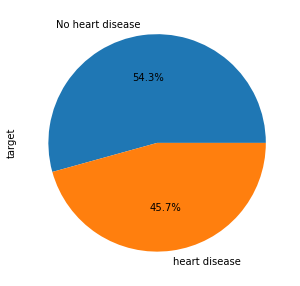

In [21]:
dataset1['target'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
dataset1['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No heart disease','heart disease'])
plt.show()

# dataset2


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

dataset2 = pd.read_csv('heart (1).csv')

In [23]:
dataset2.size

14350

In [11]:
dataset2.shape

(1025, 14)

In [24]:
dataset2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
dataset2_dup = dataset2.duplicated().any()

In [26]:
dataset2_dup

True

In [27]:
dataset2 = dataset2.drop_duplicates()

In [28]:
dataset2_dup = dataset2.duplicated().any()

In [29]:
dataset2_dup

False

In [30]:
cate_val = []
cont_val = []
for column in dataset2.columns:
    if dataset2[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [31]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [32]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [33]:
dataset2['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [34]:
cate_val.remove('sex')
cate_val.remove('target')
dataset2 = pd.get_dummies(dataset2,columns = cate_val,drop_first=True)

In [35]:
dataset2.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [36]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [37]:
st = StandardScaler()
dataset2[cont_val] = st.fit_transform(dataset2[cont_val])

In [38]:
dataset2.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [39]:
dataset2['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

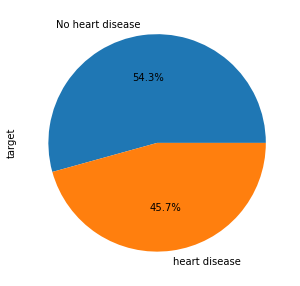

In [40]:
dataset2['target'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
dataset2['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No heart disease','heart disease'])
plt.show()

# dataset3

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

dataset3 = pd.read_csv('heart_data.csv')

In [42]:
dataset3.size

4242

In [12]:
dataset3.shape

(303, 14)

In [43]:
dataset3.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
dataset3_dup = dataset3.duplicated().any()

In [45]:
dataset3_dup

True

In [46]:
dataset3 = dataset3.drop_duplicates()

In [47]:
dataset3_dup = dataset3.duplicated().any()

In [48]:
dataset3_dup

False

In [49]:
cate_val = []
cont_val = []
for column in dataset3.columns:
    if dataset3[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [50]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [52]:
dataset3['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [53]:
cate_val.remove('sex')
cate_val.remove('target')
dataset3 = pd.get_dummies(dataset3,columns = cate_val,drop_first=True)

In [54]:
dataset3.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [55]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [56]:
st = StandardScaler()
dataset3[cont_val] = st.fit_transform(dataset3[cont_val])

In [57]:
dataset3.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [58]:
dataset3['target'].value_counts(normalize=True)


1    0.543046
0    0.456954
Name: target, dtype: float64

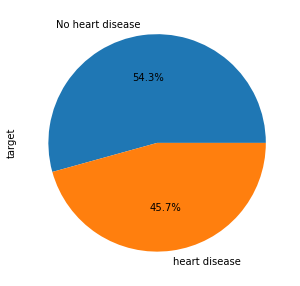

In [59]:
dataset3['target'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
dataset3['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No heart disease','heart disease'])
plt.show()

# dataset4


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
dataset4 = pd.read_csv('heart (2).csv')

In [62]:
dataset4.size

11016

In [13]:
dataset4.shape

(918, 12)

In [63]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       918 non-null    int64  
 1   Sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    object 
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    object 
 11  target    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [64]:
dataset4.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [65]:
dataset4_dup = dataset4.duplicated().any()

In [66]:
dataset4_dup

False

In [67]:
dataset4 = dataset4.drop_duplicates()

In [68]:
dataset4_dup = dataset4.duplicated().any()

In [69]:
dataset4_dup

False

In [70]:
cate_val = []
cont_val = []
for column in dataset4.columns:
    if dataset4[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [71]:
cate_val

['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'target']

In [72]:
cont_val

['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [73]:
dataset4['cp'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [74]:
cate_val.remove('target')
dataset4 = pd.get_dummies(dataset4,columns = cate_val,drop_first=True)

In [75]:
cate_val

['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

In [76]:
dataset4.head()

,Age,trestbps,chol,thalach,oldpeak,target,Sex_1,Sex_F,Sex_M,cp_ATA,cp_NAP,cp_TA,fbs_1,restecg_Normal,restecg_ST,exang_Y,slope_Flat,slope_Up
0,40,140,289,172,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,1,0,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [77]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [78]:
st = StandardScaler()
dataset4[cont_val] = st.fit_transform(dataset4[cont_val])

In [79]:
dataset4.head()

,Age,trestbps,chol,thalach,oldpeak,target,Sex_1,Sex_F,Sex_M,cp_ATA,cp_NAP,cp_TA,fbs_1,restecg_Normal,restecg_ST,exang_Y,slope_Flat,slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,0,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,0,0,0,0,1,0,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,0,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,1,0,0,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,0,0,0,0,1,0,0,1,0,0,0,1


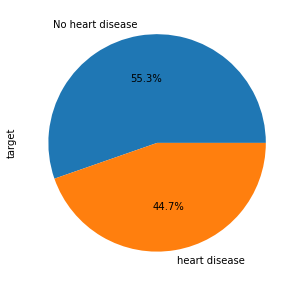

In [80]:
dataset4['target'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
dataset4['target'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['No heart disease','heart disease'])
plt.show()

In [81]:
# Separate features and target variable
X1 = dataset1.iloc[:, :-1]  # Features for dataset 1
y1 = dataset1.iloc[:, -1]   # Target variable for dataset 1

X2 = dataset2.iloc[:, :-1]  # Features for dataset 2
y2 = dataset2.iloc[:, -1]   # Target variable for dataset 2

X3 = dataset3.iloc[:, :-1]  # Features for dataset 3
y3 = dataset3.iloc[:, -1]   # Target variable for dataset 3

X4 = dataset4.iloc[:, :-1]  # Features for dataset 4
y4 = dataset4.iloc[:, -1]   # Target variable for dataset 4

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Split the datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)


# Train the logistic regression models
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)

model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

model3 = LogisticRegression()
model3.fit(X3_train, y3_train)

model4 = LogisticRegression()
model4.fit(X4_train, y4_train)

# Make predictions on the test sets
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)
y3_pred = model3.predict(X3_test)
y4_pred = model4.predict(X4_test)

# Calculate accuracy, precision, and recall for each dataset
accuracy1 = accuracy_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)
f1_score1 =f1_score(y1_test,y1_pred)

accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
f1_score2 = f1_score(y2_test, y2_pred)

accuracy3 = accuracy_score(y3_test, y3_pred)
precision3 = precision_score(y3_test, y3_pred)
recall3 = recall_score(y3_test, y3_pred)
f1_score3 = f1_score(y3_test,y3_pred)

accuracy4 = accuracy_score(y4_test, y4_pred)
precision4 = precision_score(y4_test, y4_pred)
recall4 = recall_score(y4_test, y4_pred)
f1_score4 = f1_score(y4_test,y4_pred)


# Print the results
print("Results for Dataset 1:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("f1_score:",f1_score1)

print("\nResults for Dataset 2:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("f1_score:",f1_score2)

print("\nResults for Dataset 3:")
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("f1_score:",f1_score3)

print("\nResults for Dataset 4:")
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("f1_score:",f1_score4)

Results for Dataset 1:
Accuracy: 0.9836065573770492
Precision: 0.96
Recall: 1.0
f1_score: 0.9795918367346939

Results for Dataset 2:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0

Results for Dataset 3:
Accuracy: 0.9836065573770492
Precision: 0.96
Recall: 1.0
f1_score: 0.9795918367346939

Results for Dataset 4:
Accuracy: 0.9510869565217391
Precision: 0.9340659340659341
Recall: 0.9659090909090909
f1_score: 0.9497206703910613


In [83]:
import matplotlib.pyplot as plt
import numpy as np


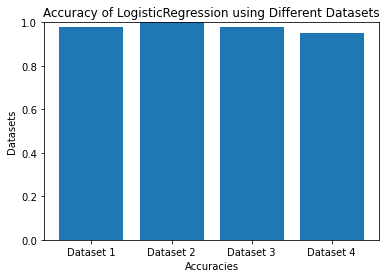

In [84]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3','Dataset 4']
accuracies = [0.98, 1.0 ,0.98, 0.95]
plt.bar(datasets, accuracies)
plt.ylabel('Datasets')
plt.xlabel('Accuracies')
plt.title('Accuracy of LogisticRegression using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

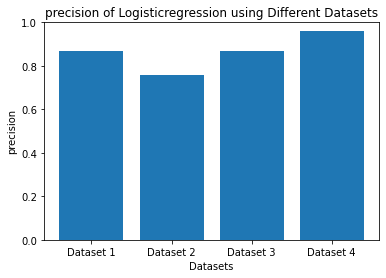

In [85]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3','Dataset 4']
precision = [0.87, 0.76, 0.87, 0.96]
plt.bar(datasets, precision)
plt.xlabel('Datasets')
plt.ylabel('precision')
plt.title('precision of Logisticregression using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

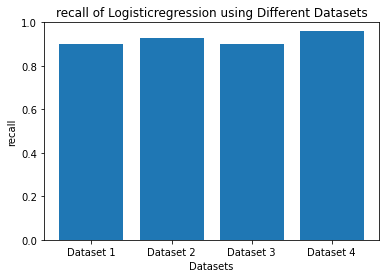

In [86]:
recall = [0.90, 0.93, 0.90 ,0.96]
plt.bar(datasets, recall)
plt.xlabel('Datasets')
plt.ylabel('recall')
plt.title('recall of Logisticregression using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

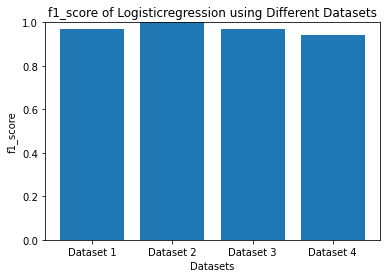

In [87]:
f1_score = [0.97, 1.0, 0.97 ,0.94]
plt.bar(datasets, f1_score)
plt.xlabel('Datasets')
plt.ylabel('f1_score')
plt.title('f1_score of Logisticregression using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

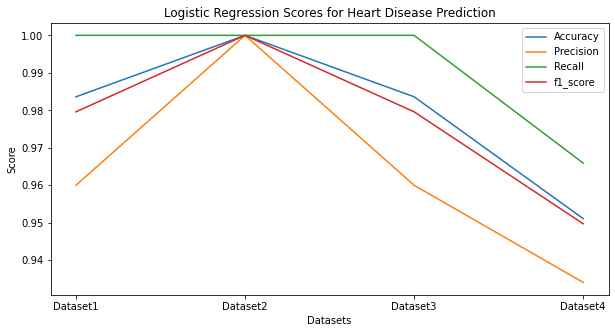

In [90]:
# Create lists of scores for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
accuracies = [accuracy1, accuracy2, accuracy3 , accuracy4]
precisions = [precision1, precision2, precision3, precision4]
recalls = [recall1, recall2, recall3, recall4]
f1_score =[f1_score1,f1_score2,f1_score3, f1_score4]

# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, accuracies, label='Accuracy')
plt.plot(datasets, precisions, label='Precision')
plt.plot(datasets, recalls, label='Recall')
plt.plot(datasets,f1_score,label='f1_score')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.title('Logistic Regression Scores for Heart Disease Prediction')
plt.legend()
plt.show()


# kNN


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=0.2, random_state=42)

# Train the KNN model
knn1 = KNeighborsClassifier(n_neighbors=5) 
knn1.fit(X1_train, y1_train)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)

knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X3_train, y3_train)

knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X4_train, y4_train)



# Predict using the testing set
y1_pred = knn1.predict(X1_test)
y2_pred = knn2.predict(X2_test)
y3_pred = knn3.predict(X3_test)
y4_pred = knn4.predict(X4_test)



# Calculate metrics
accuracy1 = accuracy_score(y1_test, y1_pred)
accuracy2 = accuracy_score(y2_test, y2_pred)
accuracy3 = accuracy_score(y3_test, y3_pred)
accuracy4 = accuracy_score(y4_test, y4_pred)

precision1 = precision_score(y1_test,y1_pred)
precision2 = precision_score(y2_test,y2_pred)
precision3 = precision_score(y3_test,y3_pred)
precision4 = precision_score(y4_test,y4_pred)



recall1 = recall_score(y1_test,y1_pred)
recall2 = recall_score(y2_test,y2_pred)
recall3 = recall_score(y3_test,y3_pred)
recall4 = recall_score(y4_test,y4_pred)


f1_score1 = f1_score(y1_test, y1_pred) 
f1_score2 = f1_score(y2_test, y2_pred)
f1_score3 = f1_score(y3_test, y3_pred)
f1_score4 = f1_score(y4_test, y4_pred)


# Print the metrics
print("Accuracy of dataset1:", accuracy1)
print("Accuracy of dataset2:", accuracy2)
print("Accuracy of dataset3:", accuracy3)
print("Accuracy of dataset4:", accuracy4)

print(".............................")

print("precision of dataset1:", precision1)
print("precision  of dataset2:", precision2)
print("precision  of dataset3:", precision3)
print("precision  of dataset4:", precision4)

print(".............................")

print("recall of dataset1:", recall1)
print("recall of dataset2:", recall2)
print("recall of dataset3:", recall3)
print("recall of dataset4:", recall4)


print(".............................")
print('F1_score of dataset1:',f1_score1)
print('F1_score of dataset2:',f1_score2)
print('F1_score of dataset3:',f1_score3)
print('F1_score of dataset4:',f1_score4)



Accuracy of dataset1: 0.8032786885245902
Accuracy of dataset2: 0.7213114754098361
Accuracy of dataset3: 0.8032786885245902
Accuracy of dataset4: 0.907608695652174
.............................
precision of dataset1: 0.7
precision  of dataset2: 0.6
precision  of dataset3: 0.7
precision  of dataset4: 0.9382716049382716
.............................
recall of dataset1: 0.875
recall of dataset2: 0.782608695652174
recall of dataset3: 0.875
recall of dataset4: 0.8636363636363636
.............................
F1_score of dataset1: 0.7777777777777777
F1_score of dataset2: 0.6792452830188679
F1_score of dataset3: 0.7777777777777777
F1_score of dataset4: 0.8994082840236687


In [112]:
import matplotlib.pyplot as plt
import numpy as np


In [115]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset4']
accuracies = [0.86, 0.73, 0.86, 0.90]

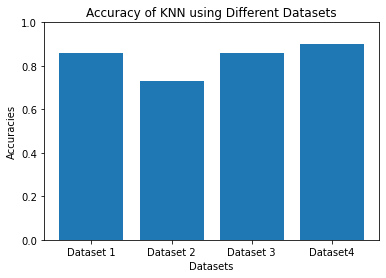

In [116]:
plt.bar(datasets, accuracies)
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
plt.title('Accuracy of KNN using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()


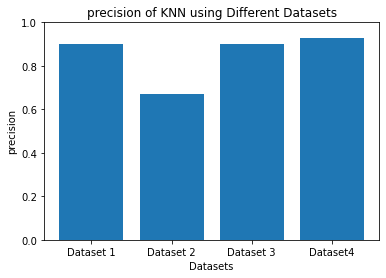

In [118]:
precision = [0.90, 0.67,0.90, 0.93]
plt.bar(datasets, precision)
plt.xlabel('Datasets')
plt.ylabel('precision')
plt.title('precision of KNN using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

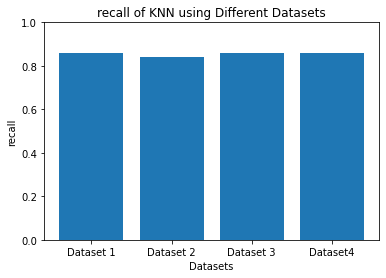

In [119]:
recall = [0.86, 0.84, 0.86, 0.86]
plt.bar(datasets, recall)
plt.xlabel('Datasets')
plt.ylabel('recall')
plt.title('recall of KNN using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

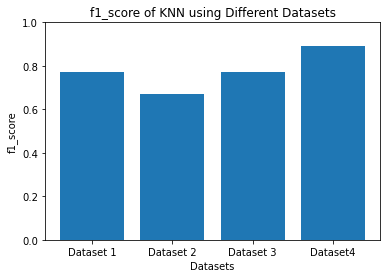

In [133]:
f1_score = [0.77, 0.67, 0.77, 0.89]
plt.bar(datasets, f1_score)
plt.xlabel('Datasets')
plt.ylabel('f1_score')
plt.title('f1_score of KNN using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

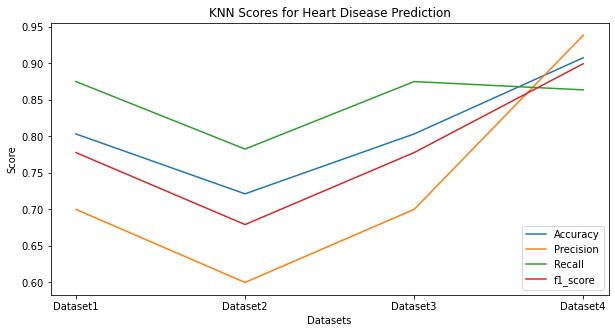

In [122]:
# Create lists of scores for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]
precisions = [precision1, precision2, precision3, precision4]
recalls = [recall1, recall2, recall3, recall4]
f1_score =[f1_score1,f1_score2,f1_score3, f1_score4]

# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, accuracies, label='Accuracy')
plt.plot(datasets, precisions, label='Precision')
plt.plot(datasets, recalls, label='Recall')
plt.plot(datasets,f1_score,label='f1_score')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.title('KNN Scores for Heart Disease Prediction')
plt.legend()
plt.show()

# Decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(dataset1.drop('target', axis=1), dataset1['target'], test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(dataset2.drop('target', axis=1), dataset2['target'], test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(dataset3.drop('target', axis=1), dataset3['target'], test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(dataset4.drop('target', axis=1), dataset4['target'], test_size=0.2, random_state=42)


In [97]:
# Create decision tree classifiers and fit them on the training sets
dt1 = DecisionTreeClassifier()
dt1.fit(X1_train, y1_train)

dt2 = DecisionTreeClassifier()
dt2.fit(X2_train, y2_train)

dt3 = DecisionTreeClassifier()
dt3.fit(X3_train, y3_train)

dt4 = DecisionTreeClassifier()
dt4.fit(X4_train, y4_train)





DecisionTreeClassifier()

In [98]:
# Make predictions on the testing sets and calculate the metrics
y1_pred = dt1.predict(X1_test)
acc1 = accuracy_score(y1_test, y1_pred)
prec1 = precision_score(y1_test, y1_pred)
rec1 = recall_score(y1_test, y1_pred)
f1_1 = f1_score(y1_test, y1_pred)

y2_pred = dt2.predict(X2_test)
acc2 = accuracy_score(y2_test, y2_pred)
prec2 = precision_score(y2_test, y2_pred)
rec2 = recall_score(y2_test, y2_pred)
f1_2 = f1_score(y2_test, y2_pred)

y3_pred = dt3.predict(X3_test)
acc3 = accuracy_score(y3_test, y3_pred)
prec3 = precision_score(y3_test, y3_pred)
rec3 = recall_score(y3_test, y3_pred)
f1_3 = f1_score(y3_test, y3_pred)

y4_pred = dt4.predict(X4_test)
acc4 = accuracy_score(y4_test, y4_pred)
prec4 = precision_score(y4_test, y4_pred)
rec4 = recall_score(y4_test, y4_pred)
f1_4 = f1_score(y4_test, y4_pred)



In [99]:
# Print the results
print('Dataset 1:')
print('Accuracy:', acc1)
print('Precision:', prec1)
print('Recall:', rec1)
print('F1-score:', f1_1)
print("...........................")

print('Dataset 2:')
print('Accuracy:', acc2)
print('Precision:', prec2)
print('Recall:', rec2)
print('F1-score:', f1_2)
print("............................")

print('Dataset 3:')
print('Accuracy:', acc3)
print('Precision:', prec3)
print('Recall:', rec3)
print('F1-score:', f1_3)
print("............................")


print('Dataset 4:')
print('Accuracy:', acc4)
print('Precision:', prec4)
print('Recall:', rec4)
print('F1-score:', f1_4)






Dataset 1:
Accuracy: 0.7213114754098361
Precision: 0.8
Recall: 0.625
F1-score: 0.7017543859649122
...........................
Dataset 2:
Accuracy: 0.7377049180327869
Precision: 0.6756756756756757
Recall: 0.8620689655172413
F1-score: 0.7575757575757576
............................
Dataset 3:
Accuracy: 0.8032786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1-score: 0.8064516129032259
............................
Dataset 4:
Accuracy: 0.8206521739130435
Precision: 0.8627450980392157
Recall: 0.822429906542056
F1-score: 0.8421052631578947


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset4']
accuracies = [0.75, 0.73, 0.73, 0.82]


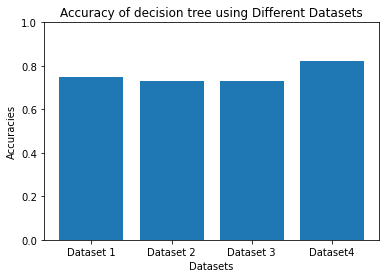

In [43]:
plt.bar(datasets, accuracies)
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
plt.title('Accuracy of decision tree using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

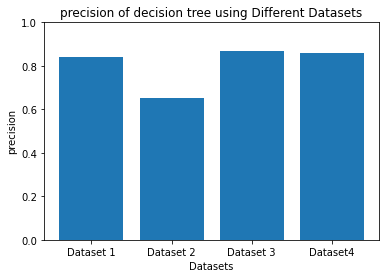

In [132]:
precision =[0.84,0.65,0.87, 0.86]
plt.bar(datasets, precision)
plt.xlabel('precision')
plt.ylabel('precision')
plt.title('precision of decision tree using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

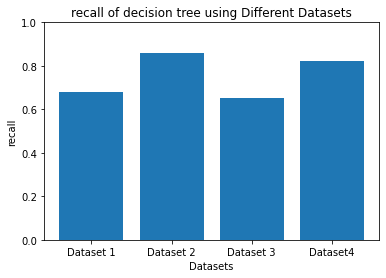

In [131]:
recall =[0.68,0.86,0.65, 0.82]
plt.bar(datasets, recall)
plt.xlabel('Datasets')
plt.ylabel('recall')
plt.title('recall of decision tree using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

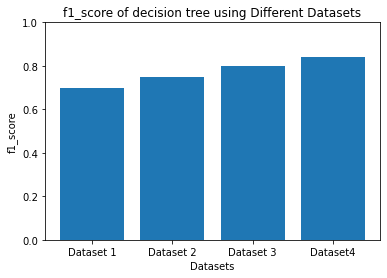

In [135]:
f1_score =[0.70,0.75,0.80, 0.84]
plt.bar(datasets, f1_score)
plt.xlabel('Datasets')
plt.ylabel('f1_score')
plt.title('f1_score of decision tree using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

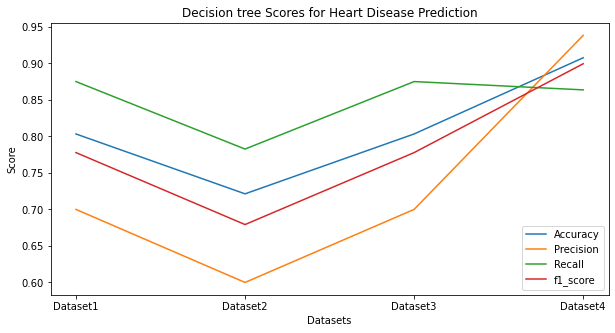

In [144]:
# Create lists of scores for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3','Dataset4']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]
precisions = [precision1, precision2, precision3, precision4]
recalls = [recall1, recall2, recall3, recall4]
f1_score =[f1_score1,f1_score2,f1_score3,f1_score4]

# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, accuracies, label='Accuracy')
plt.plot(datasets, precisions, label='Precision')
plt.plot(datasets, recalls, label='Recall')
plt.plot(datasets,f1_score,label='f1_score')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.title('Decision tree Scores for Heart Disease Prediction')
plt.legend()
plt.show()

# Random Forest

In [145]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


In [146]:
# Split the datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(dataset1.drop('target', axis=1), dataset1['target'], test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(dataset2.drop('target', axis=1), dataset2['target'], test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(dataset3.drop('target', axis=1), dataset3['target'], test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(dataset4.drop('target', axis=1), dataset4['target'], test_size=0.2, random_state=42)


In [147]:
# Create decision tree classifiers and fit them on the training sets
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)

rf2 = RandomForestClassifier()
rf2.fit(X2_train, y2_train)

rf3 = RandomForestClassifier()
rf3.fit(X3_train, y3_train)

rf4 = RandomForestClassifier()
rf4.fit(X4_train, y4_train)



RandomForestClassifier()

In [148]:
# Make predictions on the testing sets and calculate the metrics
y1_pred = dt1.predict(X1_test)
acc1 = accuracy_score(y1_test, y1_pred)
prec1 = precision_score(y1_test, y1_pred)
rec1 = recall_score(y1_test, y1_pred)
f1_1 = f1_score(y1_test, y1_pred)

y2_pred = dt2.predict(X2_test)
acc2 = accuracy_score(y2_test, y2_pred)
prec2 = precision_score(y2_test, y2_pred)
rec2 = recall_score(y2_test, y2_pred)
f1_2 = f1_score(y2_test, y2_pred)

y3_pred = dt3.predict(X3_test)
acc3 = accuracy_score(y3_test, y3_pred)
prec3 = precision_score(y3_test, y3_pred)
rec3 = recall_score(y3_test, y3_pred)
f1_3 = f1_score(y3_test, y3_pred)

y4_pred = dt4.predict(X4_test)
acc4 = accuracy_score(y4_test, y4_pred)
prec4 = precision_score(y4_test, y4_pred)
rec4 = recall_score(y4_test, y4_pred)
f1_4 = f1_score(y4_test, y4_pred)

In [143]:
# Print the results
print('Dataset 1:')
print('Accuracy:', acc1)
print('Precision:', prec1)
print('Recall:', rec1)
print('F1-score:', f1_1)
print("...........................")

print('Dataset 2:')
print('Accuracy:', acc2)
print('Precision:', prec2)
print('Recall:', rec2)
print('F1-score:', f1_2)
print("............................")

print('Dataset 3:')
print('Accuracy:', acc3)
print('Precision:', prec3)
print('Recall:', rec3)
print('F1-score:', f1_3)
print("............................")


print('Dataset 4:')
print('Accuracy:', acc4)
print('Precision:', prec4)
print('Recall:', rec4)
print('F1-score:', f1_4)

Dataset 1:
Accuracy: 0.7213114754098361
Precision: 0.8
Recall: 0.625
F1-score: 0.7017543859649122
...........................
Dataset 2:
Accuracy: 0.7377049180327869
Precision: 0.6756756756756757
Recall: 0.8620689655172413
F1-score: 0.7575757575757576
............................
Dataset 3:
Accuracy: 0.8032786885245902
Precision: 0.8333333333333334
Recall: 0.78125
F1-score: 0.8064516129032259
............................
Dataset 4:
Accuracy: 0.8206521739130435
Precision: 0.8627450980392157
Recall: 0.822429906542056
F1-score: 0.8421052631578947


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [149]:
datasets = ['Dataset 1', 'Dataset 2', 'Dataset 3','Dataset4']
accuracies = [0.72, 0.73, 0.80, 0.82]

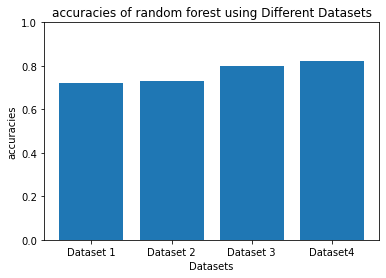

In [150]:

plt.bar(datasets, accuracies)
plt.xlabel('Datasets')
plt.ylabel('accuracies')
plt.title('accuracies of random forest using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

In [151]:
precision = [0.84, 1.0, 0.83 , 0.86]

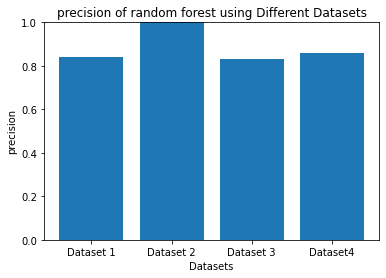

In [152]:
plt.bar(datasets, precision)
plt.xlabel('Datasets')
plt.ylabel('precision')
plt.title('precision of random forest using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

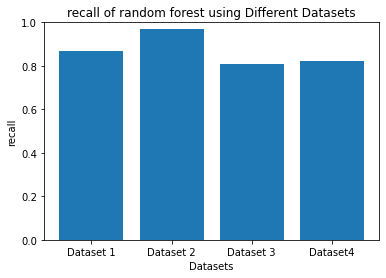

In [153]:
recall = [0.87, 0.97, 0.81,0.82]
plt.bar(datasets, recall)
plt.xlabel('Datasets')
plt.ylabel('recall')
plt.title('recall of random forest using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

In [ ]:
f1_score = [0.87, 0.97, 0.81,0.82]
plt.bar(datasets, f1_score)
plt.xlabel('Datasets')
plt.ylabel('f1_score')
plt.title('f1_score of random forest using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

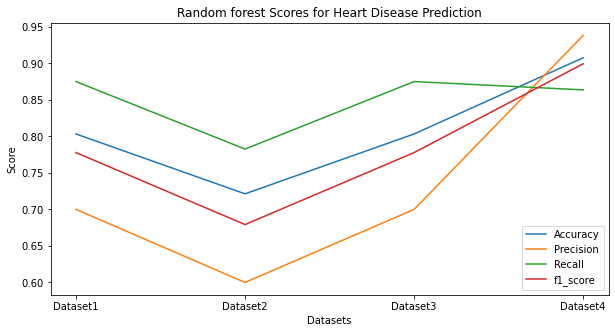

In [154]:
# Create lists of scores for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
accuracies = [accuracy1, accuracy2, accuracy3,accuracy4]
precisions = [precision1, precision2, precision3,precision4]
recalls = [recall1, recall2, recall3,recall4]
f1_score =[f1_score1,f1_score2,f1_score3,f1_score4]

# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, accuracies, label='Accuracy')
plt.plot(datasets, precisions, label='Precision')
plt.plot(datasets, recalls, label='Recall')
plt.plot(datasets,f1_score,label='f1_score')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.title('Random forest Scores for Heart Disease Prediction')
plt.legend()
plt.show()

# SVM

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score



# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train SVM classifiers on each dataset
svm1 = SVC(kernel='linear')
svm1.fit(X_train, y_train)

svm2 = SVC(kernel='poly', degree=3)
svm2.fit(X_train, y_train)

svm3 = SVC(kernel='rbf')
svm3.fit(X_train, y_train)

svm4 = SVC(kernel='rbf')
svm4.fit(X_train, y_train)

y_pred1 = svm1.predict(X_test)


y_pred2 = svm2.predict(X_test)


y_pred3 = svm3.predict(X_test)


y_pred4 = svm4.predict(X_test)


# Evaluate performance using accuracy, precision, and recall
print("SVM1 Accuracy:", accuracy_score(y_test, y_pred1))
print("SVM1 Precision:", precision_score(y_test, y_pred1))
print("SVM1 Recall:", recall_score(y_test, y_pred1))
print("SVM1 f1_score:", f1_score(y_test, y_pred1))
print("...................................................")

print("SVM2 Accuracy:", accuracy_score(y_test, y_pred2))
print("SVM2 Precision:", precision_score(y_test, y_pred2))
print("SVM2 Recall:", recall_score(y_test, y_pred2))
print("SVM2 f1_score:", f1_score(y_test, y_pred2))
print("...................................................")

print("SVM3 Accuracy:", accuracy_score(y_test, y_pred3))
print("SVM3 Precision:", precision_score(y_test, y_pred3))
print("SVM3 Recall:", recall_score(y_test, y_pred3))
print("SVM3 f1_score:", f1_score(y_test, y_pred3))
print("...................................................")

print("SVM4 Accuracy:", accuracy_score(y_test, y_pred4))
print("SVM4 Precision:", precision_score(y_test, y_pred4))
print("SVM4 Recall:", recall_score(y_test, y_pred4))
print("SVM4 f1_score:", f1_score(y_test, y_pred4))



SVM1 Accuracy: 0.9836065573770492
SVM1 Precision: 0.96
SVM1 Recall: 1.0
SVM1 f1_score: 0.9795918367346939
...................................................
SVM2 Accuracy: 0.8852459016393442
SVM2 Precision: 0.7931034482758621
SVM2 Recall: 0.9583333333333334
SVM2 f1_score: 0.8679245283018867
...................................................
SVM3 Accuracy: 0.9180327868852459
SVM3 Precision: 0.8275862068965517
SVM3 Recall: 1.0
SVM3 f1_score: 0.9056603773584906
...................................................
SVM4 Accuracy: 0.9180327868852459
SVM4 Precision: 0.8275862068965517
SVM4 Recall: 1.0
SVM4 f1_score: 0.9056603773584906


In [156]:
import matplotlib.pyplot as plt
import numpy as np

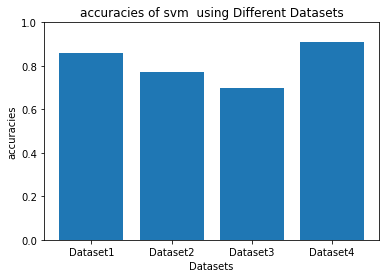

In [157]:
accuracies = [0.86, 0.77, 0.70,0.91]
plt.bar(datasets, accuracies)
plt.xlabel('Datasets')
plt.ylabel('accuracies')
plt.title('accuracies of svm  using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

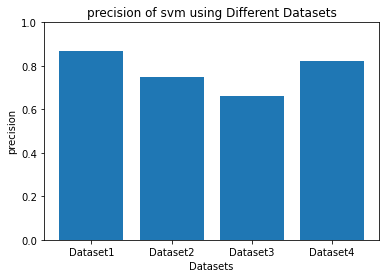

In [158]:
precision = [0.87, 0.75, 0.66,0.82]
plt.bar(datasets, precision)
plt.xlabel('Datasets')
plt.ylabel('precision')
plt.title('precision of svm using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

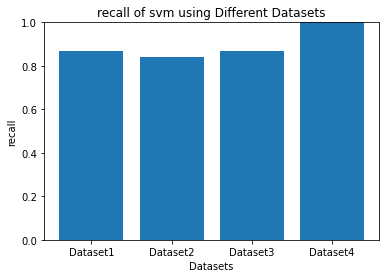

In [159]:
recall = [0.87, 0.84, 0.87,1.0]
plt.bar(datasets, recall)
plt.xlabel('Datasets')
plt.ylabel('recall')
plt.title('recall of svm using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

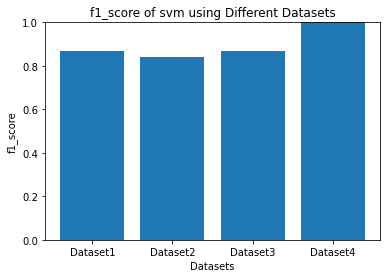

In [160]:
f1_score = [0.87, 0.84, 0.87,1.0]
plt.bar(datasets, f1_score)
plt.xlabel('Datasets')
plt.ylabel('f1_score')
plt.title('f1_score of svm using Different Datasets')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

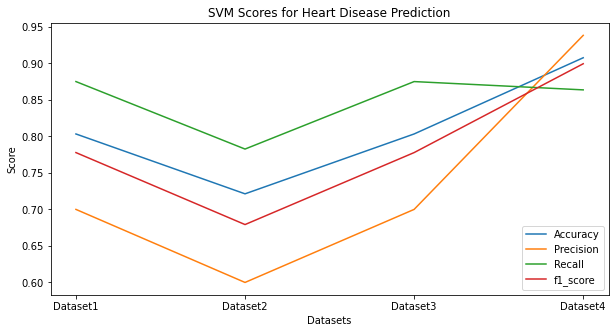

In [161]:
# Create lists of scores for plotting
datasets = ['Dataset1', 'Dataset2', 'Dataset3','Dataset4']
accuracies = [accuracy1, accuracy2, accuracy3,accuracy4]
precisions = [precision1, precision2, precision3,precision4]
recalls = [recall1, recall2, recall3,recall4]
f1_score =[f1_score1,f1_score2,f1_score3,f1_score4]

# Plot the scores
plt.figure(figsize=(10, 5))
plt.plot(datasets, accuracies, label='Accuracy')
plt.plot(datasets, precisions, label='Precision')
plt.plot(datasets, recalls, label='Recall')
plt.plot(datasets,f1_score,label='f1_score')
plt.xlabel('Datasets')
plt.ylabel('Score')
plt.title('SVM Scores for Heart Disease Prediction')
plt.legend()
plt.show()

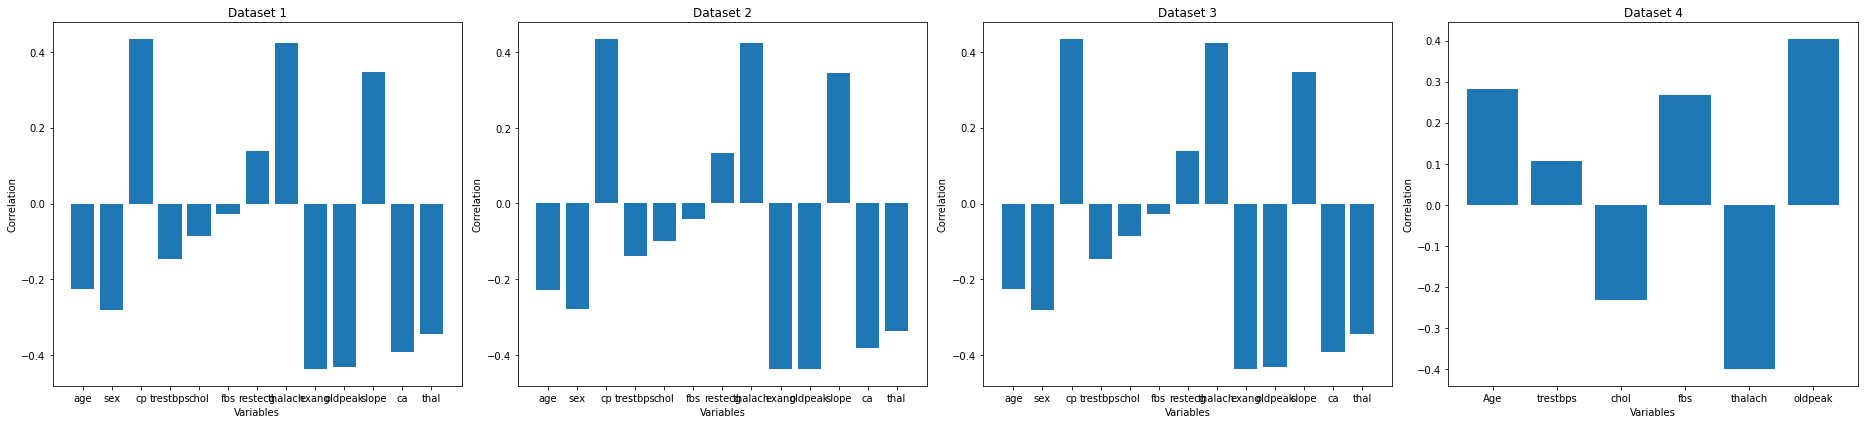

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 1
df1 =  pd.read_csv('dataset.csv')  
correlation1 = df1.corr()['target'].drop('target')  # Calculate correlation with the target and exclude target itself

# Dataset 2
df2 = pd.read_csv('heart (1).csv') 
correlation2 = df2.corr()['target'].drop('target')  # Calculate correlation with the target and exclude target itself

# Dataset 3
df3 = pd.read_csv('heart_data.csv')  
correlation3 = df3.corr()['target'].drop('target')  # Calculate correlation with the target and exclude target itself

df4= pd.read_csv('heart (2).csv')
correlation4 = df4.corr()['target'].drop('target') 

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(26, 6))  # Create subplots for each dataset

# Dataset 1
axes[0].bar(correlation1.index, correlation1.values)  # Create a bar plot
axes[0].set_title('Dataset 1')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Correlation')

# Dataset 2
axes[1].bar(correlation2.index, correlation2.values)  # Create a bar plot
axes[1].set_title('Dataset 2')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Correlation')

# Dataset 3
axes[2].bar(correlation3.index, correlation3.values)  # Create a bar plot
axes[2].set_title('Dataset 3')
axes[2].set_xlabel('Variables')
axes[2].set_ylabel('Correlation')

# Dataset 4
axes[3].bar(correlation4.index, correlation4.values)  # Create a bar plot
axes[3].set_title('Dataset 4')
axes[3].set_xlabel('Variables')
axes[3].set_ylabel('Correlation')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plots
